$$\Large \color{green}{\textbf{Phân tích dữ liệu của Citigo, Kiotviet}}$$



$$\large \color{blue}{\textbf{Phuong Van Nguyen}}$$
$$\small \color{red}{\textbf{ phuong.nguyen@summer.barcelonagse.eu}}$$


Chương trình phân tích dữ liệu này thưc hiện bởi Nguyễn Văn Phương, dựa trên nền tảng $\textbf{Anacoda 1.9.7}$ và $\textbf{Python 3.7}$.

Toàn bộ Mã chương trình, bao gồm (.py,.ipynb, .html), có thể tải tại Kho trên trang Github của tôi theo đường dẫn dưới đây

Nếu các bạn chỉ cần xem các bước Nội dung phân tích (Tatble of Contents) và các Mã lệnh đã thực hiện thì chỉ cần mở tập tin Citigo_analytics.html. Khi các bạn ở tập tin định dạng .html này ra, ở phía bên trái của của Sổ chương trình sẽ có Bảng Nội dung (Tatble of Contents), để các bạn dễ dàng dịch chuyển tới các nội dung và đoạn mã mà bạn cần xem.

Nếu các bạn muốn thực hiện lại toàn bộ quá trình thì sử dụng tập tin Citigo_analytics.py hoặc Citigo_analytics.ipynb, đặc biệt khi sử dụng tập tin Citigo_analytics.ipynb, trên thiết bị của bạn nên cài đặt chương trình $\textbf{Jupyter Notebook Extension}$. Đây là chương trình vô cùng thuận tiện cho việc viết các câu lênh và phân tích.


Để cài đặt chương trình này,các bạn thảm khảo tại :

https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html

Về Vai trò tác dụng của nó các bạn tham khảo tại:

https://towardsdatascience.com/jupyter-notebook-extensions-517fa69d2231

$$\color{green}{\underline{\textbf{Quy trình chung cho viết một chương trình Máy Học}}}$$

Các bước tiến hành để đào tạo một chương trình Máy Học như sau:

1. Gọi các Thư Viện cần thiết liên quan tới xử lý dữ liệu thô, thuật toán...

2. Nhập dữ liệu vào chương trình, có thể từ tập tin excel, hoặc csv, etc.

3. Khai phá dữ liệu thô: $\color{red}{\underline{\textbf{bước quan trọng nhất và tốn nhiều thời gian nhất}}}$.

4. Chuẩn bị dữ liệu cho đào tạo một chương trình Máy học, như tạo biến dummy, đồng bộ hoá phân phối và đơn vị đo lường của các biên, etc 

5. Chọn biến, gồm có chọn các biến có liên quan, bỏ các biến không có ý nghĩa giải thích, hoặc làm giảm bớt kích cỡ dữ liêụ, etc.

6. Đào tạo chương trình Máy Học, chọn thuật toán phù hợp nhất với dữ liệu, chọn hệ số tuỳ biến tối ưu cho thuật toán (hyperparameter tunning)

7. Lưu chương trình.



# Gọi các thư viện thuật toán cần thiết

Thông thường trong bước này mình viết một chương trình python ở một tập tin riêng, sau đó gọi hàm này áp dụng cho tất cả các trường hợp của dữ liệu. Tuy nhiên, vì trong trường hợp này, mình muốn chỉ ra những thuật toán nào thường hay sẽ sử dụng trong viết chương trình phân tích dữ liệu và Máy học nên mình tích hợp bước 1 này vào trong chương trình. Nếu các bạn quan tâm có thể tham khảo chương trình được viết riêng cho bước này ở Github của mình tại

## Cho xư lý và phân tích dữ liệu thô


In [1]:
import os
import numpy as np
import pandas as pd
from scipy import stats
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#from feature_selector import FeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

## Các thuật toán Máy Học
### Thuật toán tuyến tính

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import PassiveAggressiveRegressor

### Thuật toán phi tuyến tính

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import SVR

### Thuật toán cao cấp khác

In [5]:
from sklearn.pipeline import Pipeline

#### Các Phương pháp boosting

Hãy chắc chắn rằng thiết bị của bạn đã cài đặt gói xgboost, nếu không các bạn có thể bỏ qua nó

In [7]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBClassifier
#from xgboost import XGBRegressor

#### Các phương pháp bagging

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

#### Kêt hợp các phương pháp

In [9]:
from sklearn.ensemble import VotingClassifier

## Phương pháp đánh giá mô hình

In [203]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import mean_squared_error

##  Định nghia biến cho in kết quá

In [10]:
Purple= '\033[95m'
Cyan= '\033[96m'
Darkcyan= '\033[36m'
Blue = '\033[94m'
Green = '\033[92m'
Yellow = '\033[93m'
Red = '\033[91m'
Bold = "\033[1m"
Reset = "\033[0;0m"
Underline= '\033[4m'
End = '\033[0m'

# Nhập dự liệu

Trước khi nhập dữ liệu, bạn chắc chắn rằng thư mục làm việc của bạn có chứa tập tin bạn cần nhập

In [11]:
print(Bold + Blue + 'Thư mục làm việc hiện tại của bạn:' + End)
print(os.getcwd())

Thư mục làm việc hiện tại của bạn:
/Users/phuong/Dropbox/Machine Learning/Citigo


In [12]:
citigo_data=pd.read_csv('Product Classify - Rawdata.csv')

# Khai phá dữ liệu thô

Có hai phương pháp khai phá dữ liệu thô

1. Phương pháp thống kê mô tả.

2. Phương pháp mô tả bằng đồ thị.

## Phương pháp thống kê mô tả
### Chọn vài dữ liệu mẫu
Bạn có thể chọn xem 10, 20, hoặc nhiều hơn số quan sát đầu tiên. Ơ đây mình muốn xem 10 quan sát đầu tiên

In [13]:
citigo_data.head(10)

,Tên sản phẩm,Level 3,Level 2,Level 1
0,Bạch Linh 02,Sản phẩm trị mụn,Chăm sóc da,Sức khỏe - Làm đẹp
1,BACH LINH,Sản phẩm trị mụn,Chăm sóc da,Sức khỏe - Làm đẹp
2,Băng đô,"Lược, băng đô, lô quấn tóc",Chăm sóc tóc và da đầu,Sức khỏe - Làm đẹp
3,Băng đô,"Lược, băng đô, lô quấn tóc",Chăm sóc tóc và da đầu,Sức khỏe - Làm đẹp
4,Băng đô,"Lược, băng đô, lô quấn tóc",Chăm sóc tóc và da đầu,Sức khỏe - Làm đẹp
5,BANG DO,"Lược, băng đô, lô quấn tóc",Chăm sóc tóc và da đầu,Sức khỏe - Làm đẹp
6,"BB78,79,80,81,82,77",Trang điểm mặt,Trang điểm,Sức khỏe - Làm đẹp
7,Bio oil 75ml,Sản phẩm chăm sóc cơ thể khác,Chăm sóc cơ thể,Sức khỏe - Làm đẹp
8,Bio oil 60ml,Sản phẩm chăm sóc cơ thể khác,Chăm sóc cơ thể,Sức khỏe - Làm đẹp
9,BIO-OIL 125 ML,Sản phẩm chăm sóc cơ thể khác,Chăm sóc cơ thể,Sức khỏe - Làm đẹp


### Kiểm tra kích cỡ dữ liệu

In [38]:
print('--------------------')
print(Bold+ Red  + 'Kích cỡ dữ liệu thô:' + End)
print('--------------------')
print(Bold + Blue + 'Số quan sát: {}'.format(len(citigo_data)))
print(Bold + Blue + 'Số cột: {}'.format(len(citigo_data.columns)))
print(Bold+ Blue + 'Danh sách cột:' + End)
print(citigo_data.columns)
print('--------------------')

--------------------
Kích cỡ dữ liệu thô:
--------------------
Số quan sát: 13024
Số cột: 4
Danh sách cột:
Index(['Tên sản phẩm', 'Level 3', 'Level 2', 'Level 1'], dtype='object')
--------------------


### Kiểm tra thiếu dữ liệu

In [24]:
print(Bold + Darkcyan +'Số dữ liêu bị thiếu:'+ End)
print(citigo_data.isnull().sum())

Số dữ liêu bị thiếu:
Tên sản phẩm    0
Level 3         0
Level 2         0
Level 1         0
dtype: int64


$$\textbf{Nhận xét:}$$

Từ kết quả in ra ở trên cho thấy rất may mắn là dữ liệu thô của chúng ta không có cột nào bị thiếu dữ liệu.

### Kiểm tra dạng dữ liệu

In [25]:
print(Bold + Green+  'Dạng dữ liệu:'+ End)
print(citigo_data.dtypes)


Dạng dữ liệu:
Tên sản phẩm    object
Level 3         object
Level 2         object
Level 1         object
dtype: object


$$\textbf{Nhận xét:}$$
Toàn bộ dữ liệu định dạng là đối tượng (object) không phải dạng số (numerical). Từ đó điều đầu tiên chúng ta nghĩ tới là sẽ sư dụng các thuật toán liên quan tới dạng này cho đào tạo Máy Học (nếu cần) 

### Kiểm tra số nhóm trong mỗi cột

Như phân tích trên trong dữ liệu thô, chúng ta có 4 cột dưới đây 

1. 'Tên sản phẩm'
2. 'Level 3'
3. 'Level 2'
4. 'Level 1'

Mỗi cột có những tên sản phẩm và nhóm sản phẩm khác nhau. Vì vậy, dưới đây chúng ta sẽ lần lượt tìm hiểu xem trong mỗi cột có bao nhiêu sản phẩm và nhóm sản phẩm
#### Level 1

In [35]:
print(Bold + Green+'Số lượng nhóm có trong cột "level 1": {}'.format(len(citigo_data['Level 1'].unique())))
print(Bold + Green+'Danh sách nhóm có trong cột "level 1":'+ End)
print(np.sort(citigo_data['Level 1'].unique()))

Số lượng nhóm có trong cột "level 1": 1
Danh sách nhóm có trong cột "level 1":
['Sức khỏe - Làm đẹp']


#### Level 2

In [40]:
print(Bold + Green+'Số lượng nhóm có trong cột "level 2": {}'.format(len(citigo_data['Level 2'].unique())))
print(Bold + Green+'Danh sách nhóm có trong cột "level 2":'+ End)
print(np.sort(citigo_data['Level 2'].unique()))

Số lượng nhóm có trong cột "level 2": 6
Danh sách nhóm có trong cột "level 2":
['Chăm sóc cơ thể' 'Chăm sóc da' 'Chăm sóc tóc và da đầu' 'Nước hoa'
 'Tinh dầu spa' 'Trang điểm']


#### Level 3

In [41]:
print(Bold + Green+'Số lượng nhóm có trong cột "level 3": {}'.format(len(citigo_data['Level 3'].unique())))
print(Bold + Green+'Danh sách nhóm có trong cột "level 3":'+ End)
print(np.sort(citigo_data['Level 3'].unique()))

Số lượng nhóm có trong cột "level 3": 39
Danh sách nhóm có trong cột "level 3":
['Bộ trang điểm' 'Chăm sóc móng' 'Dưỡng Thể, tay chân' 'Dưỡng tóc, ủ tóc'
 'Dầu gội, dầu xả' 'Dụng cụ tẩy trang' 'Dụng cụ, sản phẩm tạo kiểu tóc'
 'Làm sạch da mặt & tẩy da chết' 'Lược, băng đô, lô quấn tóc'
 'Mặt nạ dưỡng da' 'Nước hoa hồng, toner' 'Nước hoa khác' 'Nước hoa nam'
 'Nước hoa nữ' 'Nước rửa tay' 'Sản phẩm chăm sóc cơ thể khác'
 'Sản phẩm chăm sóc da khác' 'Sản phẩm chăm sóc tóc khác'
 'Sản phẩm chống nắng và phục hồi' 'Sản phẩm khử mùi' 'Sản phẩm tinh dầu'
 'Sản phẩm trị mụn' 'Sản phẩm, dụng cụ tẩy lông'
 'Sữa tắm, xà bông, muối tắm, tẩy thế bào chết cơ thể' 'Thuốc duỗi, uốn'
 'Thuốc nhuộm tóc' 'Tinh chất dưỡng ẩm & trắng, chống lão hóa'
 'Tinh dầu spa khác' 'Trang điểm khác' 'Trang điểm môi' 'Trang điểm mắt'
 'Trang điểm mặt' 'Xịt khoáng' 'nước hoa khác' 'nước hoa nữ'
 'trang điểm môi' 'trang điểm mắt' 'trang điểm mặt'
 'Đèn/máy xông tinh dầu spa và phụ kiện']


#### Tên sản phẩm

In [81]:
print(Bold + Green+'Số lượng mặt hàng có trong cột "Tên sản phẩm": {}'.format(len(citigo_data['Tên sản phẩm'].unique())))
print(Bold + Green+'Danh sách nhóm có trong cột "Tên sản phẩm":'+ End)
print(np.sort(citigo_data['Tên sản phẩm'].unique()))

Số lượng mặt hàng có trong cột "Tên sản phẩm": 12966
Danh sách nhóm có trong cột "Tên sản phẩm":
['!set Gucci 3 chi tiết (8780)'
 '(BÁN THEO CẶP) Reyou-Cell 21 Days Bioscience Formula Perfect Body White Peeling & Lotion'
 '(Bộ)Kem Goodal Snail' ...
 '【Polynia】 Pomelo Brightening & Firming Mask 150 ML (mặt nạ trắng da và dưỡng ẩm tinh chất bưởi 150ML)'
 '高端西贡小姐香水 NƯỚC HOA SỨ'
 '����̛��̛́�� ����̂̉�� ���������� ���������������� ������������������ ���������� ���������� Hazel .']


$$\textbf{Nhận xét}$$

Trong bộ dữ liêu của chúng ta thống kê 12,966 sản phẩm. Tất cả các sản phẩm này đều thuộc nhóm 'Sức khỏe - Làm đẹp'. Tiếp đó, chúng lại được phân thành 6 nhóm khác nhau như.

1. 'Chăm sóc cơ thể' 
2. 'Chăm sóc da' 
3. 'Chăm sóc tóc và da đầu' 
4. 'Nước hoa'
5. 'Tinh dầu spa'
6. 'Trang điểm'

Tiếp đó, chúng lại được xếp loại vào 39 nhóm khác nhau, ví dụ như

1. 'Bộ trang điểm' 
2. 'Chăm sóc móng' 
3. 'Dưỡng Thể, tay chân' 
4. 'Dưỡng tóc, ủ tóc'
5. 'Dầu gội, dầu xả' 
6. 'Dụng cụ tẩy trang' 
7. 'Dụng cụ, sản phẩm tạo kiểu tóc'
8. etc

### Phân tích theo nhóm
Vì Level 1 chỉ gồm một nhóm hàng là 'Sức khoẻ- Làm đẹp' nên trong trường hợp này để giảm kích thước dữ liệu thuận tiện cho phân tích chúng ta có thê bỏ côt này đi

In [65]:
citigo_dat=citigo_data.drop('Level 1', axis=1)
citigo_dat.head(5)

,Tên sản phẩm,Level 3,Level 2
0,Bạch Linh 02,Sản phẩm trị mụn,Chăm sóc da
1,BACH LINH,Sản phẩm trị mụn,Chăm sóc da
2,Băng đô,"Lược, băng đô, lô quấn tóc",Chăm sóc tóc và da đầu
3,Băng đô,"Lược, băng đô, lô quấn tóc",Chăm sóc tóc và da đầu
4,Băng đô,"Lược, băng đô, lô quấn tóc",Chăm sóc tóc và da đầu


#### Level 2

In [ ]:
level2_citigo_data=citigo_dat.groupby('Level 2')

In [73]:
print(Bold + Blue + 'Sản phẩn đầu tiên trong 6 nhóm "Level 2":'+ End)
print(level2_citigo_data.first())  

Sản phẩn đầu tiên trong 6 nhóm "Level 2":
                               Tên sản phẩm                        Level 3
Level 2                                                                   
Chăm sóc cơ thể                Bio oil 75ml  Sản phẩm chăm sóc cơ thể khác
Chăm sóc da                    Bạch Linh 02               Sản phẩm trị mụn
Chăm sóc tóc và da đầu              Băng đô     Lược, băng đô, lô quấn tóc
Nước hoa                           212 SEXY                    Nước hoa nữ
Tinh dầu spa                       dau hanh              Sản phẩm tinh dầu
Trang điểm              BB78,79,80,81,82,77                 Trang điểm mặt


###### Chúng ta thử in ra tất cả các mặt hàng có trong nhóm "Chăm sóc cơ thể"

In [74]:
print(level2_citigo_data.get_group('Chăm sóc cơ thể'))

                                          Tên sản phẩm  \
7                                         Bio oil 75ml   
8                                         Bio oil 60ml   
9                                       BIO-OIL 125 ML   
10                                       BIO OIL 200ML   
12                                             body 89   
...                                                ...   
12953                                      XBT Lifeuoy   
12964  BATH & BODY WORK Carried Away Shower Gel 295 ml   
12976                                          body.vy   
12987                                  BỘT Ủ THẢO DƯỢC   
13010                           Trapha lọ 30g Traphaco   

                                                 Level 3  
7                          Sản phẩm chăm sóc cơ thể khác  
8                          Sản phẩm chăm sóc cơ thể khác  
9                          Sản phẩm chăm sóc cơ thể khác  
10                         Sản phẩm chăm sóc cơ thể khác  
12      

$$\textbf{Nhận xét:}$$
Chúng ta dễ dàng nhận thấy rằng trong nhóm "Chăm sóc cơ thể" này có tới 1,927 mặt hàng khác nhau. Tương tự, chúng ta có thể áp dụng hàm get_group cho 5 nhóm hàng còn lại. Trong trường hợp này "Level 2" của chúng ta chỉ có 6 nhóm, nên quy trình này sẽ không tốn nhiều thời gian. Tuy nhiên, khi số nhóm lên tới hàng chục, ví dụ như trường hợp của "Level 3" có tới 39 nhóm, thì quy trinh này trở nên tốn thời gian và công sức. Do đó, cách đơn giản nhất là thực hiện một trong hai đoạn mã sau

In [238]:
print(level2_citigo_data.size())

Level 2
Chăm sóc cơ thể           1927
Chăm sóc da               6090
Chăm sóc tóc và da đầu    1691
Nước hoa                   405
Tinh dầu spa               217
Trang điểm                2694
dtype: int64


In [237]:
print(level2_citigo_data.agg(['count']))

                       Tên sản phẩm Level 3
                              count   count
Level 2                                    
Chăm sóc cơ thể                1927    1927
Chăm sóc da                    6090    6090
Chăm sóc tóc và da đầu         1691    1691
Nước hoa                        405     405
Tinh dầu spa                    217     217
Trang điểm                     2694    2694


$$\textbf{Nhận xét:}$$ Cách khác chúng ta sử dụng hàm LOOP như dưới đây

In [126]:
record_level2 = pd.DataFrame(columns = ['Nhóm_hàng_level_2', 'Số_lượng_tuyệt_đối',
                                        'Số_lượng_tương_đối'])

for i, colum in enumerate(citigo_data['Level 2'].unique()):
    Nhóm_hàng_level_2=colum
    Số_lượng_tuyệt_đối=len(level2_citigo_data.get_group(colum))
    Số_lượng_tương_đối=round(100*len(level2_citigo_data.get_group(colum))/len(citigo_data['Tên sản phẩm'].unique()),
                             2)
                             
    temp_df= pd.DataFrame.from_dict({'Nhóm_hàng_level_2': [Nhóm_hàng_level_2],
                                   'Số_lượng_tuyệt_đối': [Số_lượng_tuyệt_đối],
                                   'Số_lượng_tương_đối': [Số_lượng_tương_đối]})
    #print(Nhóm_hàng_level_2,Số_lượng_tuyệt_đối,Số_lượng_tương_đối)
    record_level2=record_level2.append(temp_df,ignore_index=True)
record_level2.sort_values('Số_lượng_tuyệt_đối',ascending=False)

,Nhóm_hàng_level_2,Số_lượng_tuyệt_đối,Số_lượng_tương_đối
0,Chăm sóc da,6090,46.97
2,Trang điểm,2694,20.78
3,Chăm sóc cơ thể,1927,14.86
1,Chăm sóc tóc và da đầu,1691,13.04
5,Nước hoa,405,3.12
4,Tinh dầu spa,217,1.67


$$\textbf{Nhận xét}$$
Căn cứ Bảng trên chúng ta dễ dàng thấy được, với phân loại hàng theo "Level 2" thành 6 nhóm hàng, thì nhóm "Chăm sóc da" có số lượng mặt hằng nhiều nhất với hơn 6,000 mặt hàng, chiếm tới gần 47 % trong tổng số 12,966 mặt hàng có trong bộ dữ liệu. Tiếp theo là nhóm mặt hàng 'Trang điểm' có tới hơn 2,500 mặt hàng, chiếm hơn 20 %. Ngược lại, nhóm hàng 'Tinh dầu spa' lại có ít số lượng mặt hàng nhất, chỉ có hơn 200 mặt hàng, chiếm chưa đấy 2 % trong tổng số 12,966 mặt hàng có trong mẫu.

#### Level 3


In [131]:
level3_citigo_data=citigo_dat.groupby('Level 3')
print(Bold + Blue + 'Sản phẩn đầu tiên trong 39 nhóm hàng theo phân loại "Level 3":'+ End)
level3_citigo_data.first()

Sản phẩn đầu tiên trong 39 nhóm hàng theo phân loại "Level 3":


,Tên sản phẩm,Level 2
Level 3,,
Bộ trang điểm,480110 NOVO VIVID COLOR,Trang điểm
Chăm sóc móng,bột mỹ 27,Trang điểm
"Dưỡng Thể, tay chân",body 89,Chăm sóc cơ thể
"Dưỡng tóc, ủ tóc",U 76,Chăm sóc tóc và da đầu
"Dầu gội, dầu xả",[Combo Chuyên Sâu] Dầu gội thảo dược trị gàu/r...,Chăm sóc tóc và da đầu
Dụng cụ tẩy trang,TẨY TRANG,Trang điểm
"Dụng cụ, sản phẩm tạo kiểu tóc",chun nhỏ,Chăm sóc tóc và da đầu
Làm sạch da mặt & tẩy da chết,Cleaner,Chăm sóc da
"Lược, băng đô, lô quấn tóc",Băng đô,Chăm sóc tóc và da đầu


  Bây giờ chúng ta sẽ thống kê số mặt hàng có trong 39 nhóm hàng phân loại theo "Level 3" bằng 1 trong 3 câu lệnh dưới đây

In [239]:
print(level3_citigo_data.size())

Level 3
Bộ trang điểm                                            85
Chăm sóc móng                                           397
Dưỡng Thể, tay chân                                     405
Dưỡng tóc, ủ tóc                                        190
Dầu gội, dầu xả                                         920
Dụng cụ tẩy trang                                       280
Dụng cụ, sản phẩm tạo kiểu tóc                          264
Làm sạch da mặt & tẩy da chết                           822
Lược, băng đô, lô quấn tóc                               93
Mặt nạ dưỡng da                                         621
Nước hoa hồng, toner                                    182
Nước hoa khác                                            86
Nước hoa nam                                             87
Nước hoa nữ                                             230
Nước rửa tay                                             52
Sản phẩm chăm sóc cơ thể khác                           486
Sản phẩm chăm sóc da khác       

In [240]:
print(level3_citigo_data.agg(['count']))

                                                   Tên sản phẩm Level 2
                                                          count   count
Level 3                                                                
Bộ trang điểm                                                85      85
Chăm sóc móng                                               397     397
Dưỡng Thể, tay chân                                         405     405
Dưỡng tóc, ủ tóc                                            190     190
Dầu gội, dầu xả                                             920     920
Dụng cụ tẩy trang                                           280     280
Dụng cụ, sản phẩm tạo kiểu tóc                              264     264
Làm sạch da mặt & tẩy da chết                               822     822
Lược, băng đô, lô quấn tóc                                   93      93
Mặt nạ dưỡng da                                             621     621
Nước hoa hồng, toner                                        182 

In [139]:
record_level3 = pd.DataFrame(columns = ['Nhóm_hàng_level_3', 'Số_lượng_tuyệt_đối',
                                        'Số_lượng_tương_đối'])

for i, colum in enumerate(citigo_data['Level 3'].unique()):
    Nhóm_hàng_level_3=colum
    Số_lượng_tuyệt_đối=len(level3_citigo_data.get_group(colum))
    Số_lượng_tương_đối=round(100*len(level3_citigo_data.get_group(colum))/len(citigo_data['Tên sản phẩm'].unique()),
                             2)
                             
    temp_df= pd.DataFrame.from_dict({'Nhóm_hàng_level_3': [Nhóm_hàng_level_3],
                                   'Số_lượng_tuyệt_đối': [Số_lượng_tuyệt_đối],
                                   'Số_lượng_tương_đối': [Số_lượng_tương_đối]})
    record_level3=record_level3.append(temp_df,ignore_index=True)
record_level3.sort_values('Số_lượng_tuyệt_đối',ascending=False)

,Nhóm_hàng_level_3,Số_lượng_tuyệt_đối,Số_lượng_tương_đối
13,"Tinh chất dưỡng ẩm & trắng, chống lão hóa",2514,19.39
22,"Dầu gội, dầu xả",920,7.10
4,Sản phẩm chăm sóc da khác,896,6.91
15,Trang điểm môi,862,6.65
10,Làm sạch da mặt & tẩy da chết,822,6.34
14,"Sữa tắm, xà bông, muối tắm, tẩy thế bào chết c...",642,4.95
12,Mặt nạ dưỡng da,621,4.79
2,Trang điểm mặt,533,4.11
20,Sản phẩm chống nắng và phục hồi,531,4.10
3,Sản phẩm chăm sóc cơ thể khác,486,3.75


$$\textbf{Nhận xét:}$$

Căn cứ Bảng trên, Chúng ta có thể dễ dàng nhìn thấy, theo phân loại nhóm hàng "Level 3", thì nhóm nào có nhiều Mặt Hàng nhất và ít Mặt Hàng Nhất. Cụ thể, nhóm hàng 'Tinh chất dưỡng ẩm & trắng, chống lão hóa' có số lượng Mặt Hàng nhiều nhất, lên tới trên 2,500 Mặt Hàng, chiếm tới 19,39 % trong tổng số 12,966 Mặt Hàng có trong mẫu.

#### Kết hợp Level 2 và 3

Chúng ta đã biết, nhóm hàng phân theo Level 2 có 6 nhóm, và nhóm hàng phân theo Level 3 có 39 nhóm. Vậy thì, hai nhóm phân loại này sẽ liên quan như nào với nhau? Trong phần này chúng ta sẽ khai phá xem 39 nhóm hàng trong phân nhóm Level 3 được phân phối như nào vào 6 nhóm hàng trong Level 2

In [202]:
level23_citigo_data=citigo_dat.groupby(['Level 2','Level 3'])
print(Bold + Blue + 'Sản phẩn đầu tiên trong từng nhóm hàng:'+ End)
level23_citigo_data.first()

Sản phẩn đầu tiên trong từng nhóm hàng:


Tên sản phẩm
Level 2                Level 3                                                                                              
Chăm sóc cơ thể        Dưỡng Thể, tay chân                                                                           body 89
                       Nước rửa tay                                                                              Handgel BBW
                       Sản phẩm chăm sóc cơ thể khác                                                            Bio oil 75ml
                       Sản phẩm khử mùi                                                   (SALE) XỊT THƠM QUẦN ÁO FULL 250ML
                       Sản phẩm, dụng cụ tẩy lông                                                                   1/2 chân
                       Sữa tắm, xà bông, muối tắm, tẩy thế bào chết cơ...                                                Lux
Chăm sóc da            Làm sạch da mặt & tẩy da chết                                                                 Cleaner
                       Mặt nạ dưỡng da                                                                            1908 detox
                       Nước hoa hồng, toner                                                                       b hoa hong
                       Sản phẩm chăm sóc da khác                                                                      Bộ Nám
                       Sản phẩm chống nắng và phục hồi                                     (SALE) KCN THE SAEM HỒNG - DA DẦU
                       Sản phẩm trị mụn                                                                         Bạch Linh 02
                       Tinh chất dưỡng ẩm & trắng, chống lão hóa                                              GEL LÔ HỘI 92%
                       Xịt khoáng                                                                                 ALOE FRESH
Chăm sóc tóc và da đầu Dưỡng tóc, ủ tóc                                                                                 U 76
                       Dầu gội, dầu xả                                     [Combo Chuyên Sâu] Dầu gội thảo dược trị gàu/r...
                       Dụng cụ, sản phẩm tạo kiểu tóc                                                               chun nhỏ
                       Lược, băng đô, lô quấn tóc                                                                    Băng đô
                       Sản phẩm chăm sóc tóc khác                                                                     Xù 20g
                       Thuốc duỗi, uốn                                                                  DẬP DUỖI (HEVI) SỐ 2
                       Thuốc nhuộm tóc                                                                          Mầu Acai 440
Nước hoa               Nước hoa khác                                                                               Aura 50ml
                       Nước hoa nam                                                                         A13-100ml Active
                       Nước hoa nữ                                                                                  212 SEXY
                       nước hoa khác                                                         Chanel Paris Biarritz 125ML EDT
                       nước hoa nữ                                                                      Delicate Al Haramain
Tinh dầu spa           Sản phẩm tinh dầu                                                                            dau hanh
                       Tinh dầu spa khác                                                            Tinh dầu chống côn trùng
                       Đèn/máy xông tinh dầu spa và phụ kiện                                             Aroma Diffuser TS10
Trang điểm             Bộ trang điểm                                                                 480110 NOVO VIVID COLOR
                       Chăm sóc móng                                                                            

In [279]:
print(level23_citigo_data['Level 2'].nunique())

Level 2                 Level 3                                            
Chăm sóc cơ thể         Dưỡng Thể, tay chân                                    1
                        Nước rửa tay                                           1
                        Sản phẩm chăm sóc cơ thể khác                          1
                        Sản phẩm khử mùi                                       1
                        Sản phẩm, dụng cụ tẩy lông                             1
                        Sữa tắm, xà bông, muối tắm, tẩy thế bào chết cơ thể    1
Chăm sóc da             Làm sạch da mặt & tẩy da chết                          1
                        Mặt nạ dưỡng da                                        1
                        Nước hoa hồng, toner                                   1
                        Sản phẩm chăm sóc da khác                              1
                        Sản phẩm chống nắng và phục hồi                        1
                        Sản phẩm 

$$\textbf{Nhận xét:}$$

Bằng trực quan, căn cứ Bảng trên chúng ta dễ dàng nhìn thấy 39 nhóm hàng theo phân loại Level 3 phân bổ như thế nào vào trong 6 nhóm hàng theo phân loại Level 2. Trong trường hợp chúng ta có thể đếm được bằng mặt thường. Ví dụ, nhóm hàng 'Tinh dầu spa' thuộc phân loại Level 2 sẽ được phân loại tiếp thành 3 nhóm hàng trong Level 3 như sau

1. Sản phẩm tinh dầu.
2. Tinh dầu spa khác.
3. Đèn/máy xông tinh dầu spa và phụ kiện


Tuy nhiên, trong trường hợp dữ liệu lớn, thì việc đếm bằng mắt thường như vậy là vô cùng bất tiện. Do đó, chúng ta sẽ tiến hành viết đoạn mã để thực hiện việc thống kê trên như sau.

In [227]:
level23_citigo_data.size()#agg(['count'])


Level 2                 Level 3                                            
Chăm sóc cơ thể         Dưỡng Thể, tay chân                                     405
                        Nước rửa tay                                             52
                        Sản phẩm chăm sóc cơ thể khác                           486
                        Sản phẩm khử mùi                                        300
                        Sản phẩm, dụng cụ tẩy lông                               42
                        Sữa tắm, xà bông, muối tắm, tẩy thế bào chết cơ thể     642
Chăm sóc da             Làm sạch da mặt & tẩy da chết                           822
                        Mặt nạ dưỡng da                                         621
                        Nước hoa hồng, toner                                    182
                        Sản phẩm chăm sóc da khác                               896
                        Sản phẩm chống nắng và phục hồi                         531


Level 2                 Level 3                                            
Chăm sóc cơ thể         Dưỡng Thể, tay chân                                     405
                        Nước rửa tay                                             52
                        Sản phẩm chăm sóc cơ thể khác                           486
                        Sản phẩm khử mùi                                        300
                        Sản phẩm, dụng cụ tẩy lông                               42
                        Sữa tắm, xà bông, muối tắm, tẩy thế bào chết cơ thể     642
Chăm sóc da             Làm sạch da mặt & tẩy da chết                           822
                        Mặt nạ dưỡng da                                         621
                        Nước hoa hồng, toner                                    182
                        Sản phẩm chăm sóc da khác                               896
                        Sản phẩm chống nắng và phục hồi                         531


In [270]:
level23_citigo_data.get_group(('Trang điểm','trang điểm mặt'))

,Tên sản phẩm
1029,Cover Up Cushion 2C0
1030,Cover Up Cushion 3W1


## Phương pháp mô tả bằng đồ thị

Theo trực quan, thì khai phá dữ liệu thô bằng đồ thị là dễ dàng hiểu nhanh được dữ liệu nhất. Như phân tích ở trên, chúng ta có 12,966 sản phẩm các loại, đều thuộc nhóm 'Sức khỏe - Làm đẹp', trong nhóm này lại được phân thành 6 nhóm mặt hàng nhỏ bên trong và chi tiết hơn nữa là phân loại thành 39 nhóm hàng khác nhau. Do đó, chúng ta hay phân tích sự nhóm hàng theo "Level 2" và "level 3" để biết được sự phổ biến của các nhóm hàng.

### Đồ thị dạng cột (bar)

#### Level 2

Cách nhanh nhất để xem phân phối của 12,966 Mặt Hàng vào 6 nhóm hàng theo phân loại "Level 2", là chúng ta sử dụng hàm countplot, như dưới đây

##### Count plot

Text(0.5, 1.0, 'Phân bổ của 12,966 mặt hàng theo nhóm hàng Level 2')

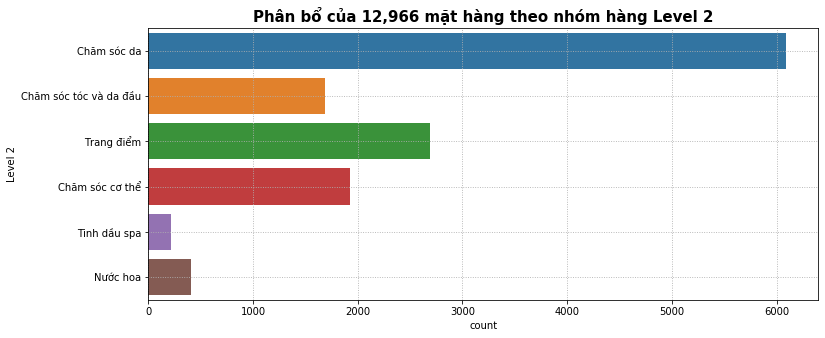

In [55]:
plt.figure(figsize=(12, 5))
sns.countplot(y='Level 2',data=citigo_data,
             orient='h')
plt.grid(which='major',linestyle=':',linewidth=0.9)
plt.title('Phân bổ của 12,966 mặt hàng theo nhóm hàng Level 2',
          fontsize=15,fontweight='bold')

$$\textbf{Nhận xét}$$

Cách thứ hai, chúng ta có thể sử dụng kết quả tính toán ở trên và tự vẽ đồ thị theo đoạn mã dưới đây

##### Số tuyệt đối

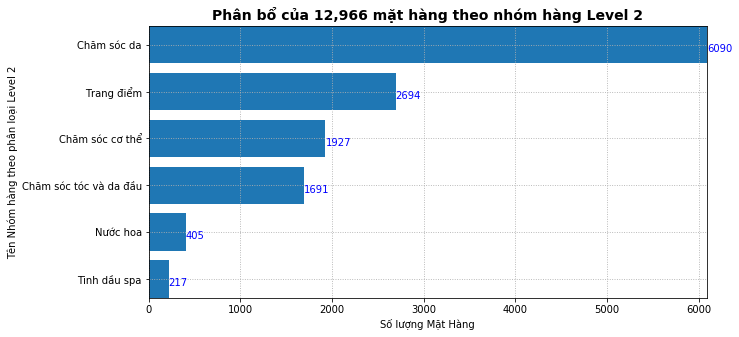

In [150]:
record_level22=record_level2.set_index(['Nhóm_hàng_level_2'])
fig, ax=plt.subplots(figsize=(10,5)) 
plt.barh(record_level22['Số_lượng_tuyệt_đối'].sort_values(ascending=True).index,
         record_level22['Số_lượng_tuyệt_đối'].sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('Phân bổ của 12,966 mặt hàng theo nhóm hàng Level 2',
        fontsize=14, fontweight='bold')
plt.ylabel('Tên Nhóm hàng theo phân loại Level 2',fontsize=10)
plt.xlabel('Số lượng Mặt Hàng', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
for i,v in enumerate(record_level22['Số_lượng_tuyệt_đối'].sort_values(ascending=True)):
    ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')

$$\textbf{Nhận xét}$$


Từ đồ thị trên ta thấy, nhóm hàng "Chăm sóc da" chiếm phần lớn, có tới trên 6000 sản phẩm. Đứng thứ hai là nhóm hàng "Trang điểm", với trên 2,500 sản phẩm. Tiếp theo nhóm hàng "Chăm sóc cơ thể" và "Chăm sóc tóc và da đầu", với trên 1,500 mặt hàng. Trong khi đó Cả hai nhóm "Nước hoa" và "Tinh dầu spa" đều có chư tới 500 mặt hàng. Đặc biệt, nhóm "Tinh dầu spa" là ít mặt hàng nhất (217 Mặt Hàng).

##### Số tương đối

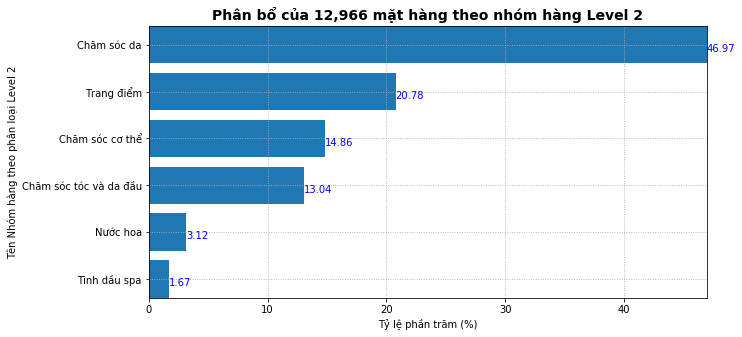

In [158]:
fig, ax=plt.subplots(figsize=(10,5)) 
plt.barh(record_level22['Số_lượng_tương_đối'].sort_values(ascending=True).index,
         record_level22['Số_lượng_tương_đối'].sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('Phân bổ của 12,966 mặt hàng theo nhóm hàng Level 2',
        fontsize=14, fontweight='bold')
plt.ylabel('Tên Nhóm hàng theo phân loại Level 2',fontsize=10)
plt.xlabel('Tỷ lệ phần trăm (%)', fontsize=10)
plt.grid(which='major',linestyle=':',linewidth=0.9)
for i,v in enumerate(record_level22['Số_lượng_tương_đối'].sort_values(ascending=True)):
    ax.text(v , i-0.15 , str(v), color='blue')#, fontweight='bold')

$$\textbf{Nhận xét}$$


Từ đồ thị trên ta thấy, nhóm hàng "Chăm sóc da" chiếm phần lớn, chiếm tới gần 45% trong tổng số 12,966 Mặt Hàng. Đứng thứ hai là nhóm hàng "Trang điểm", chiếm tới gần 21%. Tiếp theo nhóm hàng "Chăm sóc cơ thể" và "Chăm sóc tóc và da đầu", chiếm tới chưa đầy 15%. Trong khi đó Cả hai nhóm "Nước hoa" và "Tinh dầu spa" chiếm tới chưa đầy 5%. Đặc biệt, nhóm "Tinh dầu spa" là ít mặt hàng nhất, chỉ chiếm chưa đầy 2% trong tổng số gần 13,000 Mặt Hàng.



#### Level 3

Tương tự như vậy, cách dễ nhanh nhất và đơn giản nhất để xem xem 12,966 Mặt Hàng phân bổ như thế nào vào 39 nhóm Hàng theo tiêu chí "Level 3", chúng ta có thể sử dụng hàm countplot

##### Count Plot

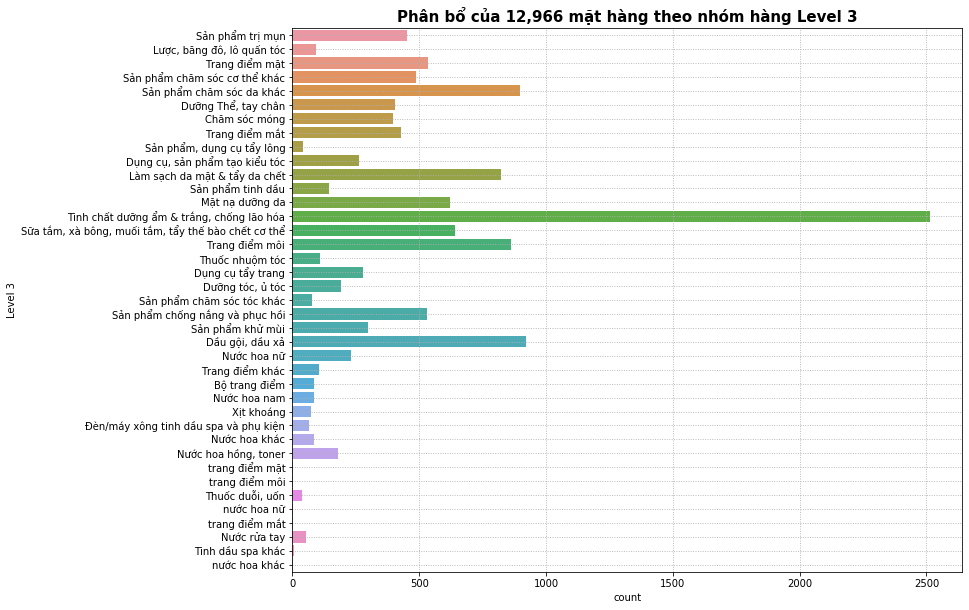

In [56]:
plt.figure(figsize=(12, 10))
sns.countplot(y='Level 3',data=citigo_data,
             orient='h')
plt.title('Phân bổ của 12,966 mặt hàng theo nhóm hàng Level 3',
          fontsize=15,fontweight='bold')
plt.grid(which='major',linestyle=':',linewidth=0.9)

$$\textbf{Nhận xét:}$$

Tương tự, chúng ta có thể dựa vào số liệu tính toán ở trên để tự vẽ sự phân bổ của 12,966 Mặt Hàng vào trong 39 nhóm hàng theo phân loại "Level 2" như sau

##### Số tuyệt đối

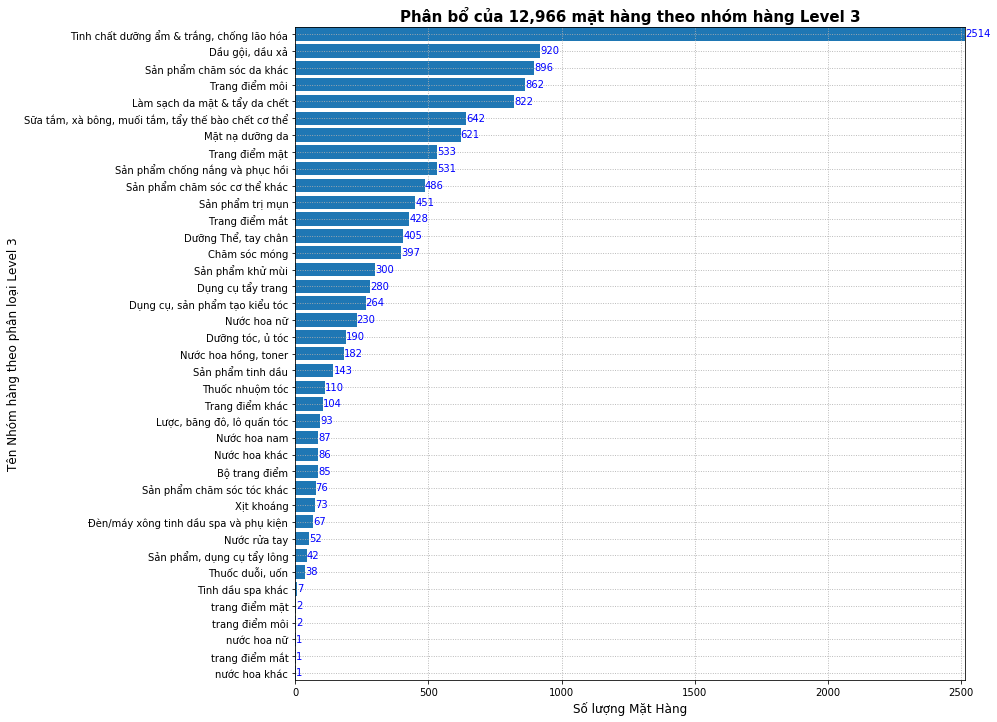

In [156]:
record_level32=record_level3.set_index(['Nhóm_hàng_level_3'])
fig, ax=plt.subplots(figsize=(12,12)) 
plt.barh(record_level32['Số_lượng_tuyệt_đối'].sort_values(ascending=True).index,
         record_level32['Số_lượng_tuyệt_đối'].sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('Phân bổ của 12,966 mặt hàng theo nhóm hàng Level 3',
        fontsize=15, fontweight='bold')
plt.ylabel('Tên Nhóm hàng theo phân loại Level 3',fontsize=12)
plt.xlabel('Số lượng Mặt Hàng', fontsize=12)
plt.grid(which='major',linestyle=':',linewidth=0.9)
for i,v in enumerate(record_level32['Số_lượng_tuyệt_đối'].sort_values(ascending=True)):
    ax.text(v , i-0.15 , str(v), color='blue')

##### Số tương đối

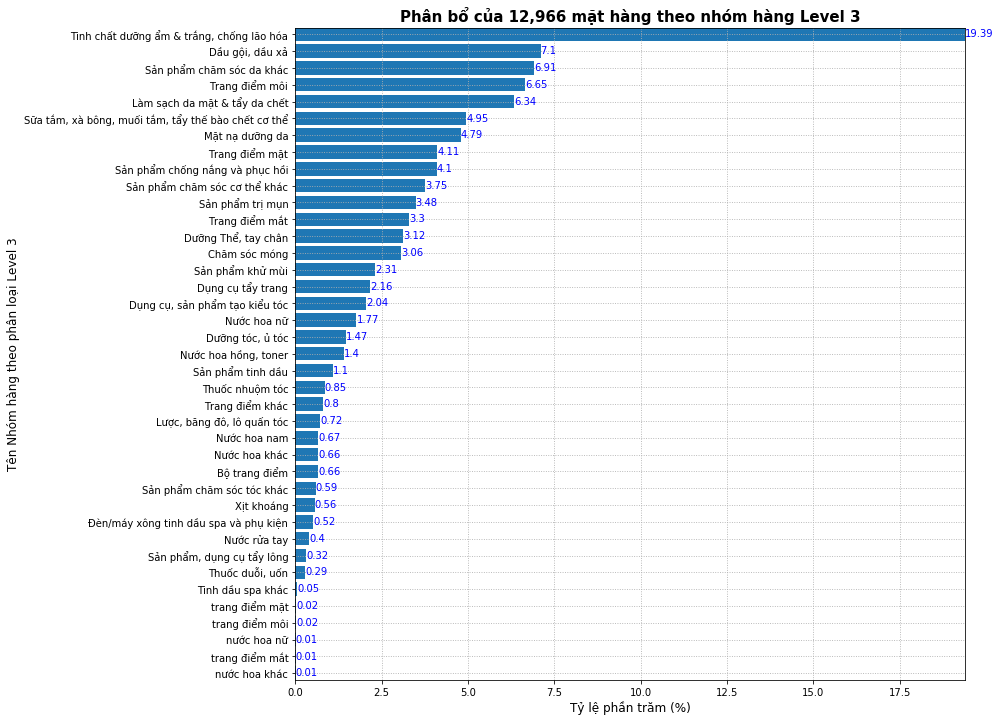

In [157]:
fig, ax=plt.subplots(figsize=(12,12)) 
plt.barh(record_level32['Số_lượng_tương_đối'].sort_values(ascending=True).index,
         record_level32['Số_lượng_tương_đối'].sort_values(ascending=True))
plt.autoscale(enable=True, axis='both',tight=True)
plt.title('Phân bổ của 12,966 mặt hàng theo nhóm hàng Level 3',
        fontsize=15, fontweight='bold')
plt.ylabel('Tên Nhóm hàng theo phân loại Level 3',fontsize=12)
plt.xlabel('Tỷ lệ phần trăm (%)', fontsize=12)
plt.grid(which='major',linestyle=':',linewidth=0.9)
for i,v in enumerate(record_level32['Số_lượng_tương_đối'].sort_values(ascending=True)):
    ax.text(v , i-0.15 , str(v), color='blue')

$$\textbf{Nhận xét:}$$

Chúng ta dễ dàng nhận thấy nhóm hàng thuộc về "Tinh chất dưỡng ẩm & trắng, chống lão hoá" có số mặt hàng vượt trội và nhiều nhất so với 38 nhóm hàng còn lại, với trên 2500 mặt hàng. Trong khi các nhóm hàng thuộc về
1. "trang điểm mặt", 
2. "trang điểm môi", 
3. "nước hoa nữ"
4. "trang điểm mắt"
5. "tinh dầu khác"
6. "nước hoa khác" 

có số sản phẩm ít nhất và gần như là không có sản phẩm nào trong 6 nhóm hàng này.

### Đồ thị miếng (Pie)

#### Level 2

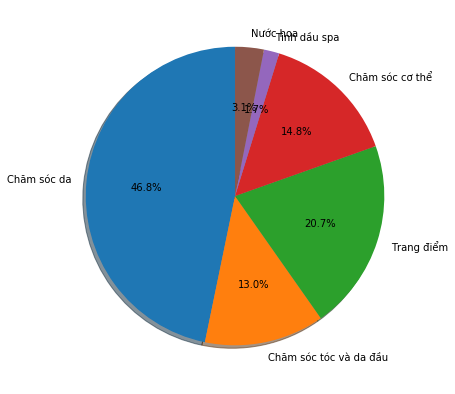

In [176]:
labels=record_level22.index
fig1, ax1 = plt.subplots(figsize=(6, 7))
ax1.pie(record_level22['Số_lượng_tuyệt_đối'],
         labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

$$\textbf{Nhận xét:}$$

Chúng ta có thể tạo ghi chú bên ngoài Đồ thị như đoạn Mã dưới đây, cách vẽ này đặc biệt hữu dụng khi số lượng nhóm lớn như Level 3

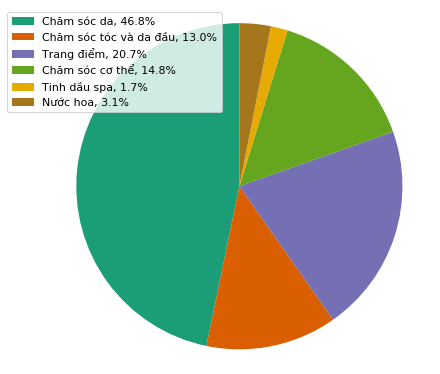

In [196]:
sizes = record_level22['Số_lượng_tuyệt_đối']
labels=record_level22.index
NUM_COLORS = len(record_level22['Số_lượng_tuyệt_đối'])

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.1,0,1,1)

theme = plt.get_cmap('Dark2') #  'prism'
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

#### Level 3

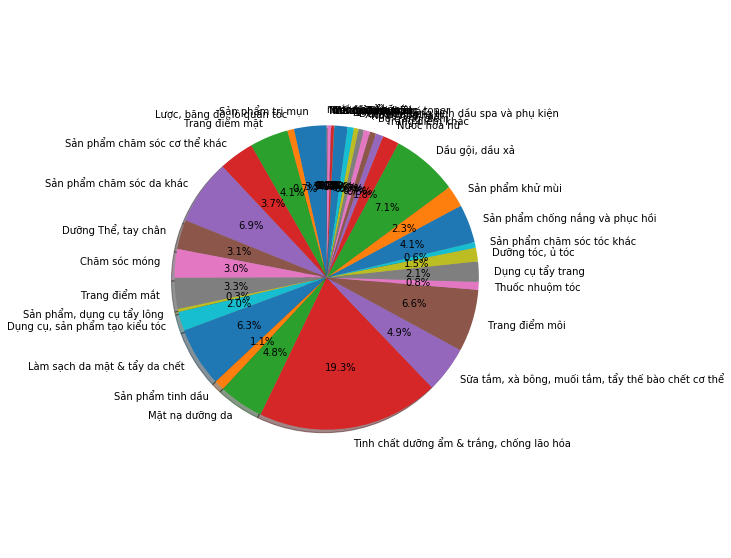

In [178]:
labels3=record_level32['Số_lượng_tuyệt_đối'].index
fig1, ax1 = plt.subplots(figsize=(6, 10))
#fig1, ax1 = plt.subplots()
ax1.pie(record_level32['Số_lượng_tuyệt_đối'],
         labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

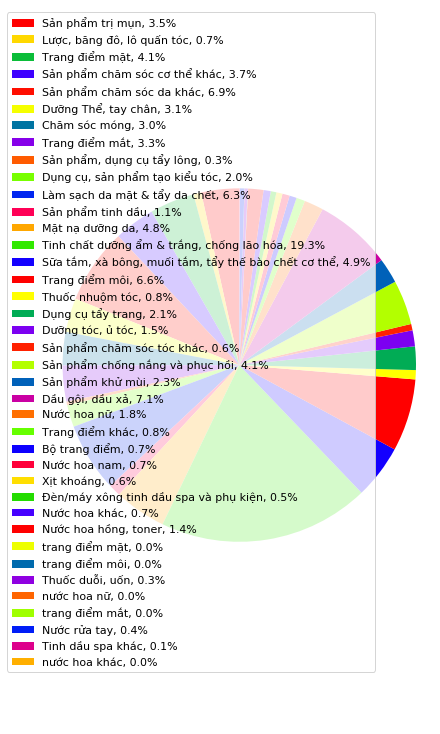

In [198]:
sizes = record_level32['Số_lượng_tuyệt_đối']
labels=record_level32.index
NUM_COLORS = len(record_level22['Số_lượng_tuyệt_đối'])

fig1, ax1 = plt.subplots(figsize=(6, 10))
fig1.subplots_adjust(0.1,0,1,1)

theme = plt.get_cmap('prism')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()